# Sun data

## Import libraries

In [1]:
"""Basic ones"""
import polars as pl
from plotnine import *
import matplotlib.pyplot as plt
plt.show()  # for display figures after ggplot
# plt.rcParams['axes.grid'] = True
import numpy as np
import seaborn as sns
import pandas
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

## Load data

- ~~合計全天日射量(MJ/㎡)~~
- 日照時間(時間)
- ~~日照時間(時間)現象なし情報~~

In [2]:
file_name = "../../data/weather/sun.csv"
df = pl.read_csv(file_name, encoding="cp932", skip_rows=3)
display(df.columns)
df.columns = ["date", "day_of_week", "sun_sphere", "sun_hour", "sun_hour_info"]
df = df.drop(["sun_sphere"])
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y/%m/%d")) # convert day column data type into date type
df.head()

['年月日', '曜日', '合計全天日射量(MJ/㎡)', '日照時間(時間)', '日照時間(時間)現象なし情報']

date,day_of_week,sun_hour,sun_hour_info
date,str,f64,i64
2017-07-01,"""土""",0.3,0
2017-07-02,"""日""",0.7,0
2017-07-03,"""月""",2.4,0
2017-07-04,"""火""",0.0,0
2017-07-05,"""水""",5.5,0


## Check nulls

In [3]:
display(df.null_count())

nulls = df.hstack(df.transpose().select(pl.all().is_null().sum()).transpose().rename({"column_0": "null_count"}))
nulls.filter(pl.col("null_count") != 0)

date,day_of_week,sun_hour,sun_hour_info
u32,u32,u32,u32
0,0,1,0


date,day_of_week,sun_hour,sun_hour_info,null_count
date,str,f64,i64,u32
2020-02-13,"""木""",null,0,1


## Visualization

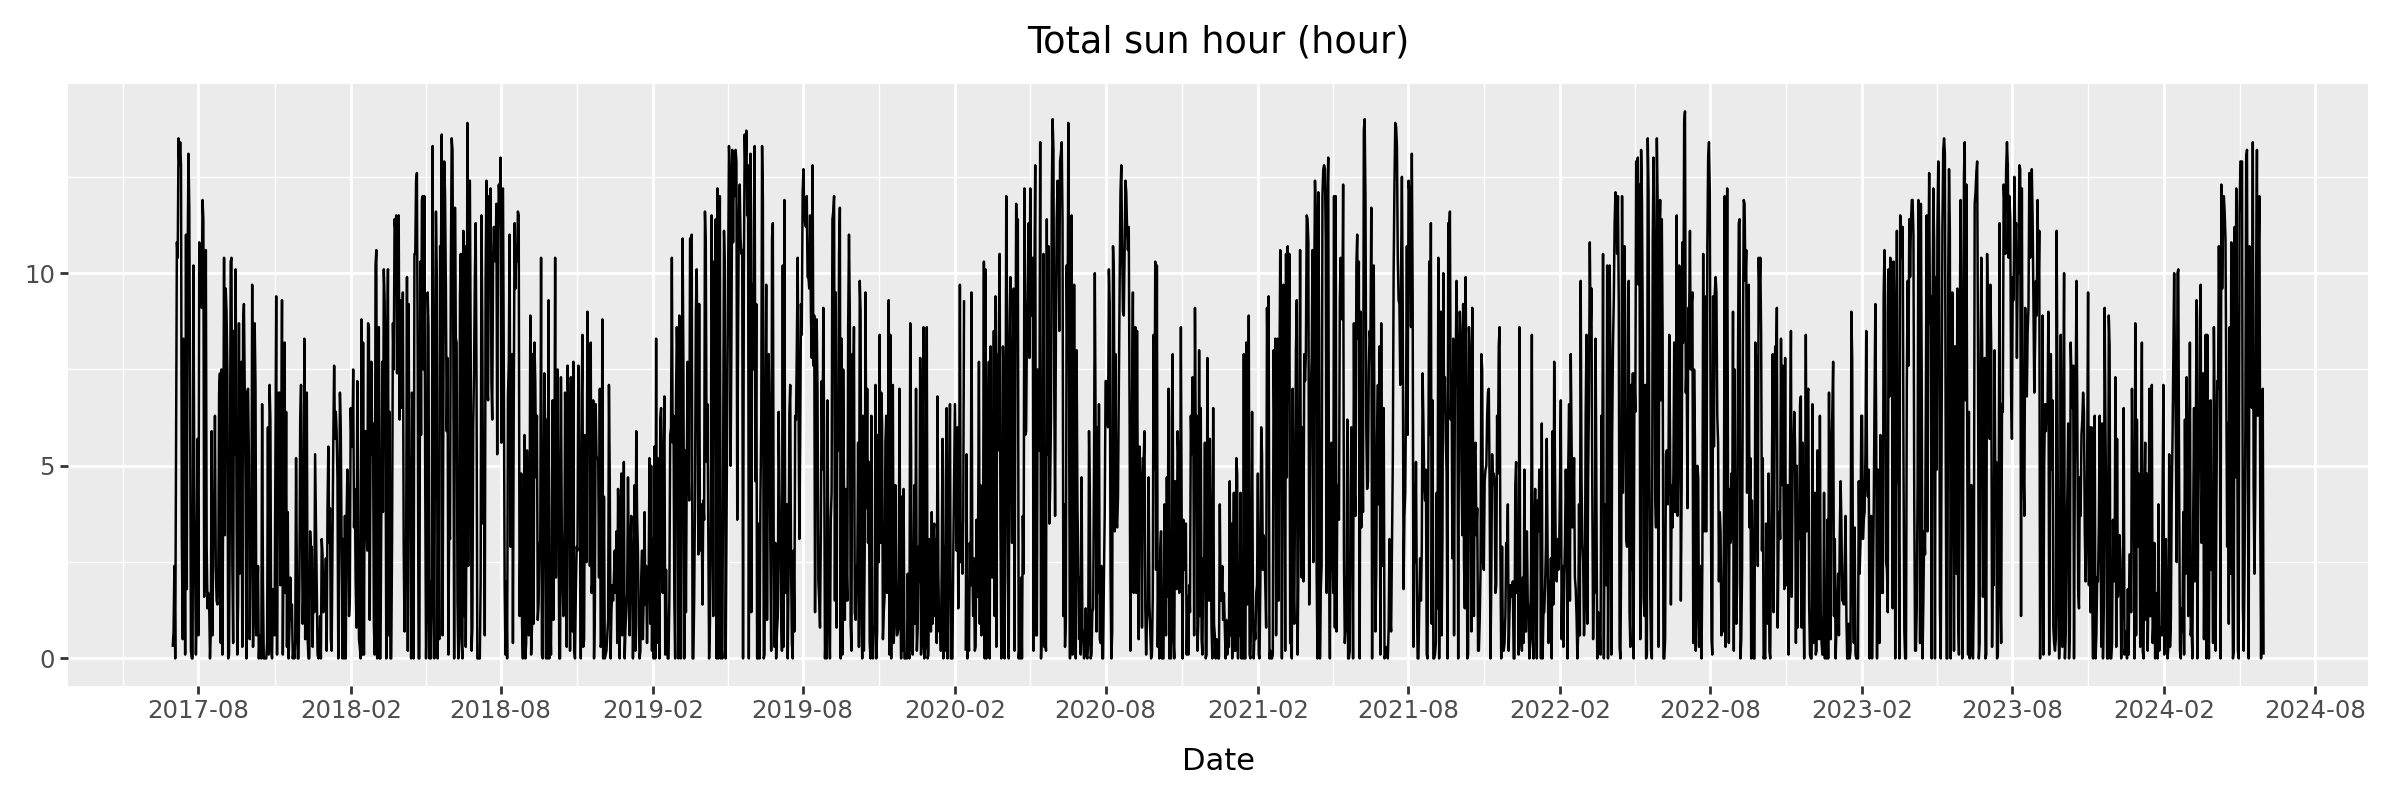

In [4]:
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="sun_hour"))
    + labs(title="Total sun hour (hour)", x="Date", y="")
    + theme(figure_size=(12, 4))
    + scale_x_date(
    #     limits=(
    #         datetime(year=2018, month=1, day=1),
    #         datetime(year=2022, month=1, day=1)
    #     ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)# .save(filename="../../fig/weather/sun.png")

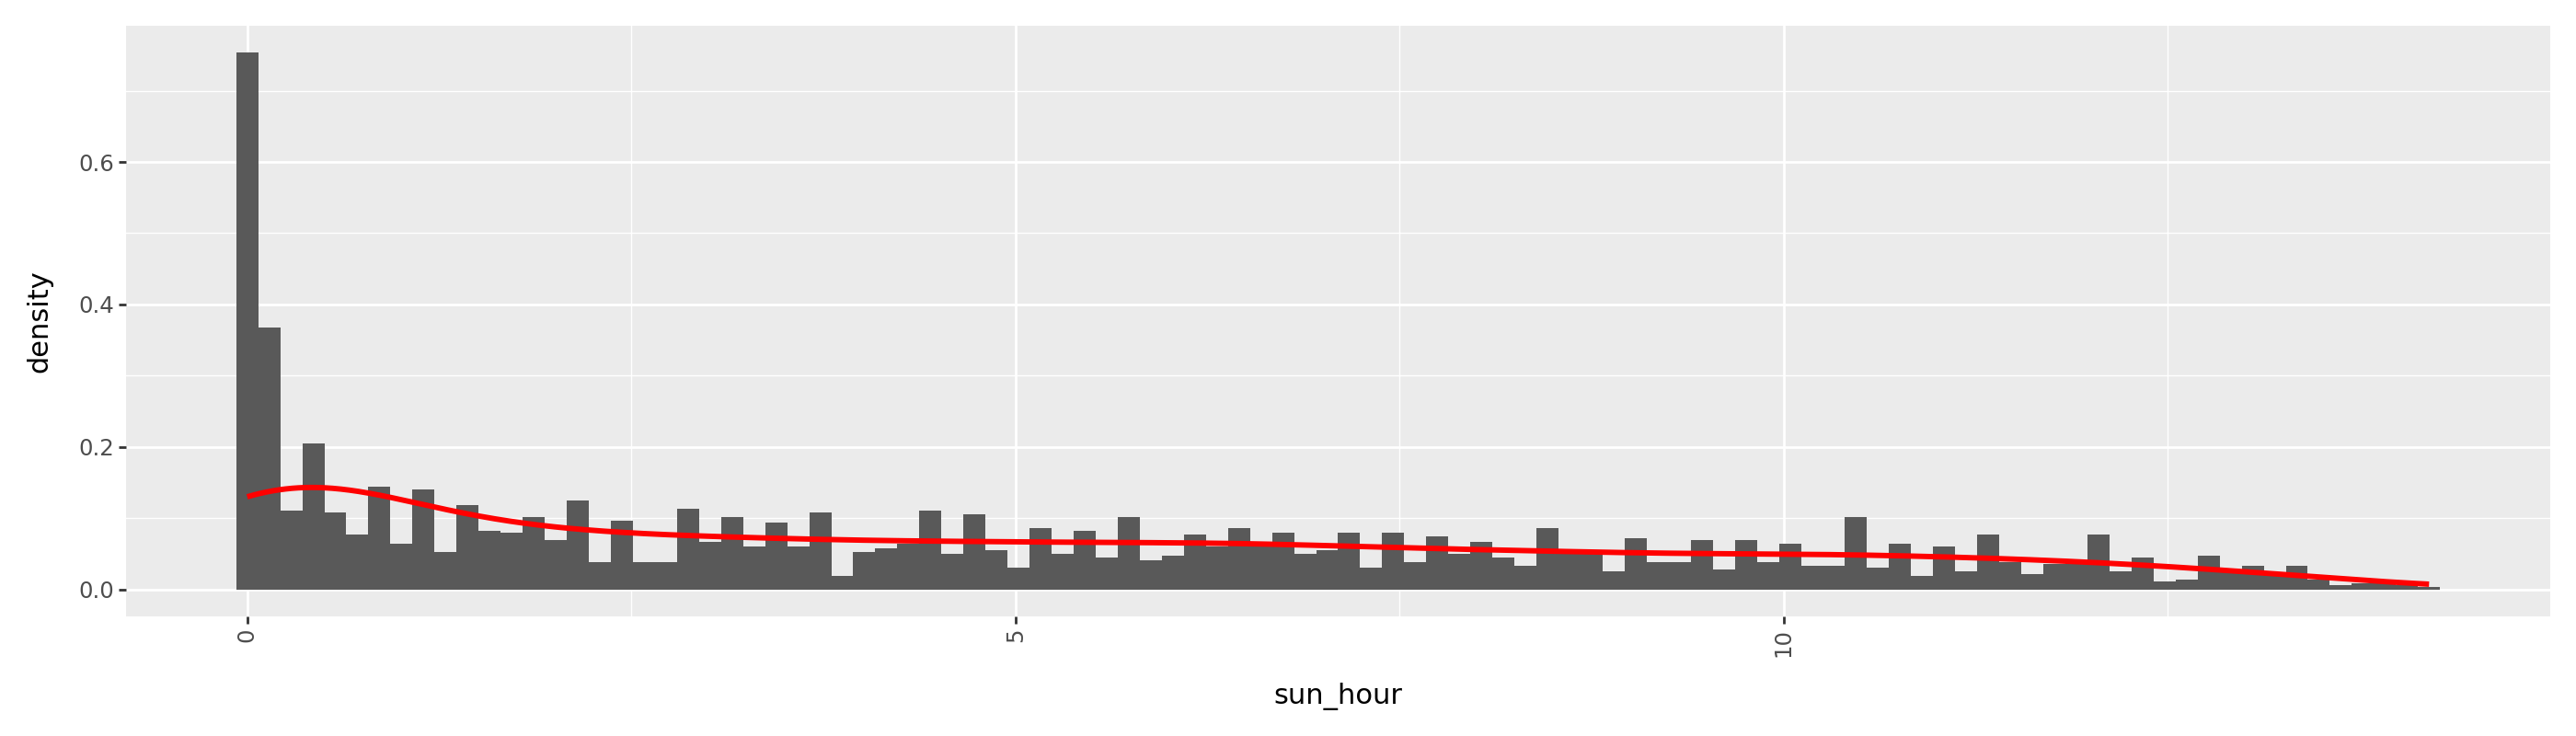

In [6]:
(
    ggplot(data=df, mapping=aes(x="sun_hour"))
    + geom_histogram(aes(y="..density.."), bins=100)
    + geom_density(size=1.2, color="red")
    + theme(figure_size=(14, 4), axis_text_x=element_text(rotation=90))
    # + xlim(0, 100)
)